In [2]:
import pandas as pd
import matplotlib as plt

from matplotlib.pyplot import imshow

import numpy as np

In [3]:
df = pd.read_csv('train.csv')
df.head()

,label,pixel0,pixel1,pixel2,pixel3,pixel4,pixel5,pixel6,pixel7,pixel8,...,pixel774,pixel775,pixel776,pixel777,pixel778,pixel779,pixel780,pixel781,pixel782,pixel783
0,1,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,1,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,4,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [4]:
len(df)

42000

# me armo las matrices de cada digito

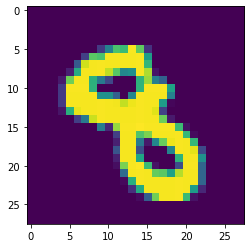

In [5]:
#para la primera fila

d1 = df.loc[67,'pixel0':].values.reshape(28,28)
imshow(d1)


In [6]:
#defino una funcion para cada fila
def get_m(row):
    return row.values[1:].reshape(28,28)

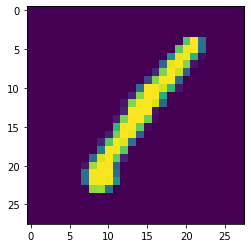

In [7]:
imshow(get_m(df.loc[0]))

In [8]:
#consigo una matriz por digito
df['m'] = df.apply(get_m, axis=1)

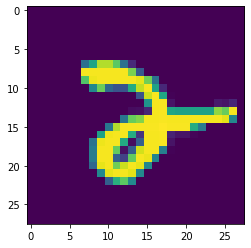

In [9]:
imshow(df.loc[34 , 'm'])

In [10]:
#me armo un dataframe de solo matrices con labels
dm = df[['label' , 'm']]


# train

classifiers:

LogisticRegressor() # Logit regression

KNeighborsClassifier() # KNN

SVC() # Support Vector Classifier

In [11]:
#(n_samples, n_features)

#features son todos los pixeles
X = df.loc[: , 'pixel0':'pixel783']
X = np.array(X)
X.shape

(42000, 784)

In [12]:
#target son los labels posibles

y = df.label
y =y.values
y.shape

(42000,)

In [13]:
#train test split 
from sklearn.model_selection import train_test_split


In [14]:
X_train, X_test, y_train, y_test = train_test_split(X , y, test_size=0.30 , random_state=42)

## kn classifier

In [1]:
from sklearn.neighbors import KNeighborsClassifier

In [18]:
knc = KNeighborsClassifier()

In [19]:
knc.fit(X_train , y_train)

KNeighborsClassifier()

In [20]:
knc.score(X_test , y_test)

0.9655555555555555

prediction:  [5]
real digit:  5


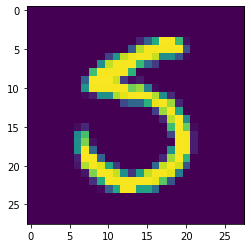

In [22]:
digit = 450

print('prediction: ' , knc.predict(X_test[digit].reshape(1,-1)))
print('real digit: ' , y_test[digit])

imshow(X_test[digit].reshape(28,28))

In [31]:
# save the model to disk
#filename_c = 'knc.sav'
#pickle.dump(knc, open(filename_c, 'wb'))

*KNN works well enough, lets do a gridsearch to find the best hyperparameters*

### gridsearch for knn classifier

In [15]:
from sklearn.model_selection import GridSearchCV


In [16]:
# Instanciate model
model = KNeighborsClassifier()



In [17]:
# Hyperparameter Grid
grid = {'n_neighbors':[5 , 7 , 10 ,12,  15] ,
        
        'weights' : ['uniform' , 'distance'],
        
        'algorithm' : ['auto', 'ball_tree', 'kd_tree', 'brute' ] , 
        
        
    }



In [18]:
# Instanciate Grid Search
search = GridSearchCV(model, grid, 
                           scoring = 'accuracy',
                           cv = 3 ,
                      verbose = 3
                          ) 

# Fit data to Grid Search
search.fit(X_train,y_train);

Fitting 3 folds for each of 40 candidates, totalling 120 fits
[CV 1/3] END algorithm=auto, n_neighbors=5, weights=uniform;, score=0.960 total time=  34.4s
[CV 2/3] END algorithm=auto, n_neighbors=5, weights=uniform;, score=0.959 total time=  21.8s
[CV 3/3] END algorithm=auto, n_neighbors=5, weights=uniform;, score=0.963 total time=  20.8s
[CV 1/3] END algorithm=auto, n_neighbors=5, weights=distance;, score=0.961 total time=  17.8s
[CV 2/3] END algorithm=auto, n_neighbors=5, weights=distance;, score=0.961 total time=  18.7s
[CV 3/3] END algorithm=auto, n_neighbors=5, weights=distance;, score=0.964 total time=  21.3s
[CV 1/3] END algorithm=auto, n_neighbors=7, weights=uniform;, score=0.958 total time=  28.9s
[CV 2/3] END algorithm=auto, n_neighbors=7, weights=uniform;, score=0.954 total time=  16.6s
[CV 3/3] END algorithm=auto, n_neighbors=7, weights=uniform;, score=0.961 total time=  20.5s
[CV 1/3] END algorithm=auto, n_neighbors=7, weights=distance;, score=0.960 total time=  22.4s
[CV 

[CV 2/3] END algorithm=kd_tree, n_neighbors=15, weights=uniform;, score=0.948 total time= 4.8min
[CV 3/3] END algorithm=kd_tree, n_neighbors=15, weights=uniform;, score=0.952 total time= 4.8min
[CV 1/3] END algorithm=kd_tree, n_neighbors=15, weights=distance;, score=0.951 total time= 5.7min
[CV 2/3] END algorithm=kd_tree, n_neighbors=15, weights=distance;, score=0.950 total time= 4.8min
[CV 3/3] END algorithm=kd_tree, n_neighbors=15, weights=distance;, score=0.955 total time= 4.7min
[CV 1/3] END algorithm=brute, n_neighbors=5, weights=uniform;, score=0.960 total time= 1.4min
[CV 2/3] END algorithm=brute, n_neighbors=5, weights=uniform;, score=0.959 total time=  17.9s
[CV 3/3] END algorithm=brute, n_neighbors=5, weights=uniform;, score=0.963 total time=  17.0s
[CV 1/3] END algorithm=brute, n_neighbors=5, weights=distance;, score=0.961 total time=  16.5s
[CV 2/3] END algorithm=brute, n_neighbors=5, weights=distance;, score=0.961 total time=  15.9s
[CV 3/3] END algorithm=brute, n_neighbor

In [20]:
print('the best score was: ' , search.best_score_)

the best score was:  0.9621428571428572


In [21]:
print('the best parameters: ' , search.best_params_)

the best parameters:  {'algorithm': 'auto', 'n_neighbors': 5, 'weights': 'distance'}


In [44]:
best_model = search.best_estimator_

### split-test data score

In [45]:
best_model.score(X_test , y_test)

0.9662698412698413

# train tuned model with *all* the csv

In [49]:
from sklearn.neighbors import KNeighborsClassifier

knc_tot = KNeighborsClassifier(n_neighbors=5 , weights='distance')
knc_tot.fit(X , y)

KNeighborsClassifier(weights='distance')

# predict test for kaggle

In [47]:
#traigo test data set para predecir

df_test = pd.read_csv('test.csv')
#defino una funcion para cada fila
def get_m_test(row):
    return row.values[:].reshape(28,28)

df_test['m'] = df_test.apply(get_m_test, axis=1)

test_digits = df_test.m.values 

In [48]:
#features son todos los pixeles
X_test_data = df_test.loc[: , 'pixel0':'pixel783']
X_test_data = np.array(X_test_data)
X_test_data.shape

(28000, 784)

In [50]:
#predigo con modelo entrenado total


test_data_predictions = knc_tot.predict(X_test_data)

In [51]:
df_test.index.values

array([    0,     1,     2, ..., 27997, 27998, 27999])

In [53]:
df_submit = pd.DataFrame({'ImageID':df_test.index.values +1 ,'Label': test_data_predictions}).set_index('ImageID')

df_submit

,Label
ImageID,
1,2
2,0
3,9
4,9
5,3
...,...
27996,9
27997,7
27998,3


In [54]:
df_submit.to_csv('digit_recon_submission_file_2.csv', )